In [23]:
import pandas as pd
import matplotlib.pyplot as plt

gfe=pd.read_excel("gfe.xlsx")
gfe=gfe.set_index(pd.to_datetime(gfe["Tarih"]))
del gfe["Tarih"]

gfe_aylık=gfe.resample('M').mean()

gfe

C:\Users\Bora\AppData\Local\Temp\ipykernel_5584\4248131872.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gfe_aylık=gfe.resample('M').mean()


,GFE,Adjusted
Tarih,,
2024-10-11,100.000000,100.193313
2024-10-12,100.270259,100.379094
2024-10-13,100.168941,100.418515
2024-10-14,100.720353,100.780194
2024-10-15,100.914669,100.863091
2024-10-16,101.173334,100.982253
2024-10-17,101.296106,100.940091
2024-10-18,100.433474,100.596755
2024-10-19,100.335928,100.467348


In [16]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)

In [ ]:
endeksler=endeksler.T
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=len(endeksler)))
endeksler

In [7]:
endeksler=((endeksler.loc["2024-10-31"]/100)-1)*100

In [76]:
ağırlıklar=pd.read_excel("Weights_2022.xlsx")
ağırlıklar=ağırlıklar[["Unnamed: 5","Unnamed: 4"]]
ağırlıklar["Unnamed: 4"]=ağırlıklar["Unnamed: 4"]*100

In [77]:
ağırlıklar=ağırlıklar.iloc[4:132]
ağırlıklar=ağırlıklar.fillna(method="ffill")

C:\Users\Bora\AppData\Local\Temp\ipykernel_20996\687292031.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ağırlıklar=ağırlıklar.fillna(method="ffill")


In [78]:
ağırlıklar["Artış"]=endeksler.values

In [79]:
ağırlıklar.columns=["Grup","Ağırlık","Artış"]
ağırlıklar

,Grup,Ağırlık,Artış
4,Pirinç,1.012932,3.734033
5,Un ve diğer tahıllar,2.035180,0.505967
6,Un ve diğer tahıllar,0.500646,0.631592
7,Un ve diğer tahıllar,0.595179,5.698307
8,Ekmek,10.027262,2.175406
...,...,...,...
127,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.204993,1.192031
128,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.746265,2.751033
129,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.094077,0.682948
130,"Alkolsüz içecekler (meşrubat, ayran vb.)",0.159504,0.208950


In [80]:
ağırlıklar['Ağırlıklı Artış'] = ağırlıklar['Ağırlık'] * ağırlıklar['Artış']

# Group by 'Grup' and calculate total weight and weighted average artış
grouped = ağırlıklar.groupby('Grup').agg(
    total_weight=('Ağırlık', 'sum'),
    weighted_increase=('Ağırlıklı Artış', 'sum')
)

In [81]:
grouped['Ağırlıklı_Artış'] = grouped['weighted_increase'] / grouped['total_weight']

In [82]:
harcama=pd.read_excel("C:/Users/Bora/Documents/GitHub/Enflasyon-SATRIM/harcamagrupları_aylık.xlsx")
harcama=harcama.set_index("Unnamed: 0")
harcama

,Pirinç,Un ve diğer tahıllar,Ekmek,"Diğer fırıncılık ürünleri (bisküvi, kek, kraker, yufka, baklava vb.)",Makarna çeşitleri,Kahvaltılık tahıl ürünleri,Dana eti,Kuzu eti,Tavuk eti,Diğer etler ve yenilebilir sakatatlar,...,"Kişisel hijyen ve bakım için kullanılan ürünler, kozmetikler","Mücevheratlar, saat ve kol saatleri",Seyahat malzemeleri ve diğer kişisel aksesuarlar,Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar,Çocuk bakım hizmetleri (kreşler),Konut sigortası,Sağlık sigortası,Ulaştırma sigortası,Başka yerde sınıflandırılmayan diğer mali hizmetler (para havale ücreti vb.),"Başka yerde sınıflandırılmayan diğer hizmetler (noterlik, avukatlık hizmetleri vb.)"
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2019-02-28,3.961780,0.214919,1.141512,1.201612,0.090657,1.688687,-0.225963,1.717411,1.122899,0.789068,...,-1.415153,-0.085449,-1.457363,-1.266122,0.939979,0.700568,1.133086,0.912931,2.250858,0.032031
2019-03-31,0.442726,1.049951,0.208599,0.509539,1.911873,0.276097,2.435755,1.396612,1.738398,1.953667,...,-0.454460,2.218675,-0.209819,-0.163012,0.869901,0.391112,1.291530,1.653665,0.000000,0.032021
2019-04-30,1.406015,1.746474,0.773495,0.761613,2.310778,-0.704539,9.075937,1.605430,12.796387,4.910995,...,1.829287,3.715538,0.969645,-0.374450,0.808358,0.155146,2.252760,0.782752,0.000000,0.905195
2019-05-31,2.892251,0.273770,5.203305,1.429808,3.521705,0.766627,5.445821,1.088409,16.227338,3.057524,...,-0.111310,4.808586,0.553961,1.027053,0.817512,-0.041308,0.293016,0.947203,0.000000,0.058160
2019-06-30,1.042744,2.312026,2.110245,1.199705,3.705804,1.861519,0.908164,-0.326003,4.627751,-1.667420,...,3.401845,1.644896,-0.377996,0.471535,0.992556,0.327158,0.002197,0.478357,0.000000,0.033467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30,0.314790,0.549812,5.942102,4.361117,2.714539,11.817672,-2.293611,-2.049387,-3.888717,-0.982700,...,1.999136,0.467939,-0.006742,4.920143,2.324070,2.867590,-7.704407,-1.880345,0.000000,0.147834
2024-07-31,2.557995,1.125570,5.205402,2.046185,1.377829,3.404377,1.224243,-1.692276,-3.439482,0.219515,...,3.155140,2.693685,2.196925,0.007934,4.712569,2.006253,10.886802,6.858257,0.000000,0.291081
2024-08-31,1.871750,0.273636,1.832868,3.013872,0.582605,5.120149,-1.959981,-2.370725,-5.610712,-2.532162,...,0.984102,3.865529,3.459310,3.342518,3.062606,1.257967,10.032163,2.887708,0.000000,0.344028


In [83]:
harcama=harcama.loc["2024-10-31"].iloc[:37]

In [85]:
grouped=grouped.loc[harcama.index]

In [87]:
grouped["TÜİK"]=harcama.values

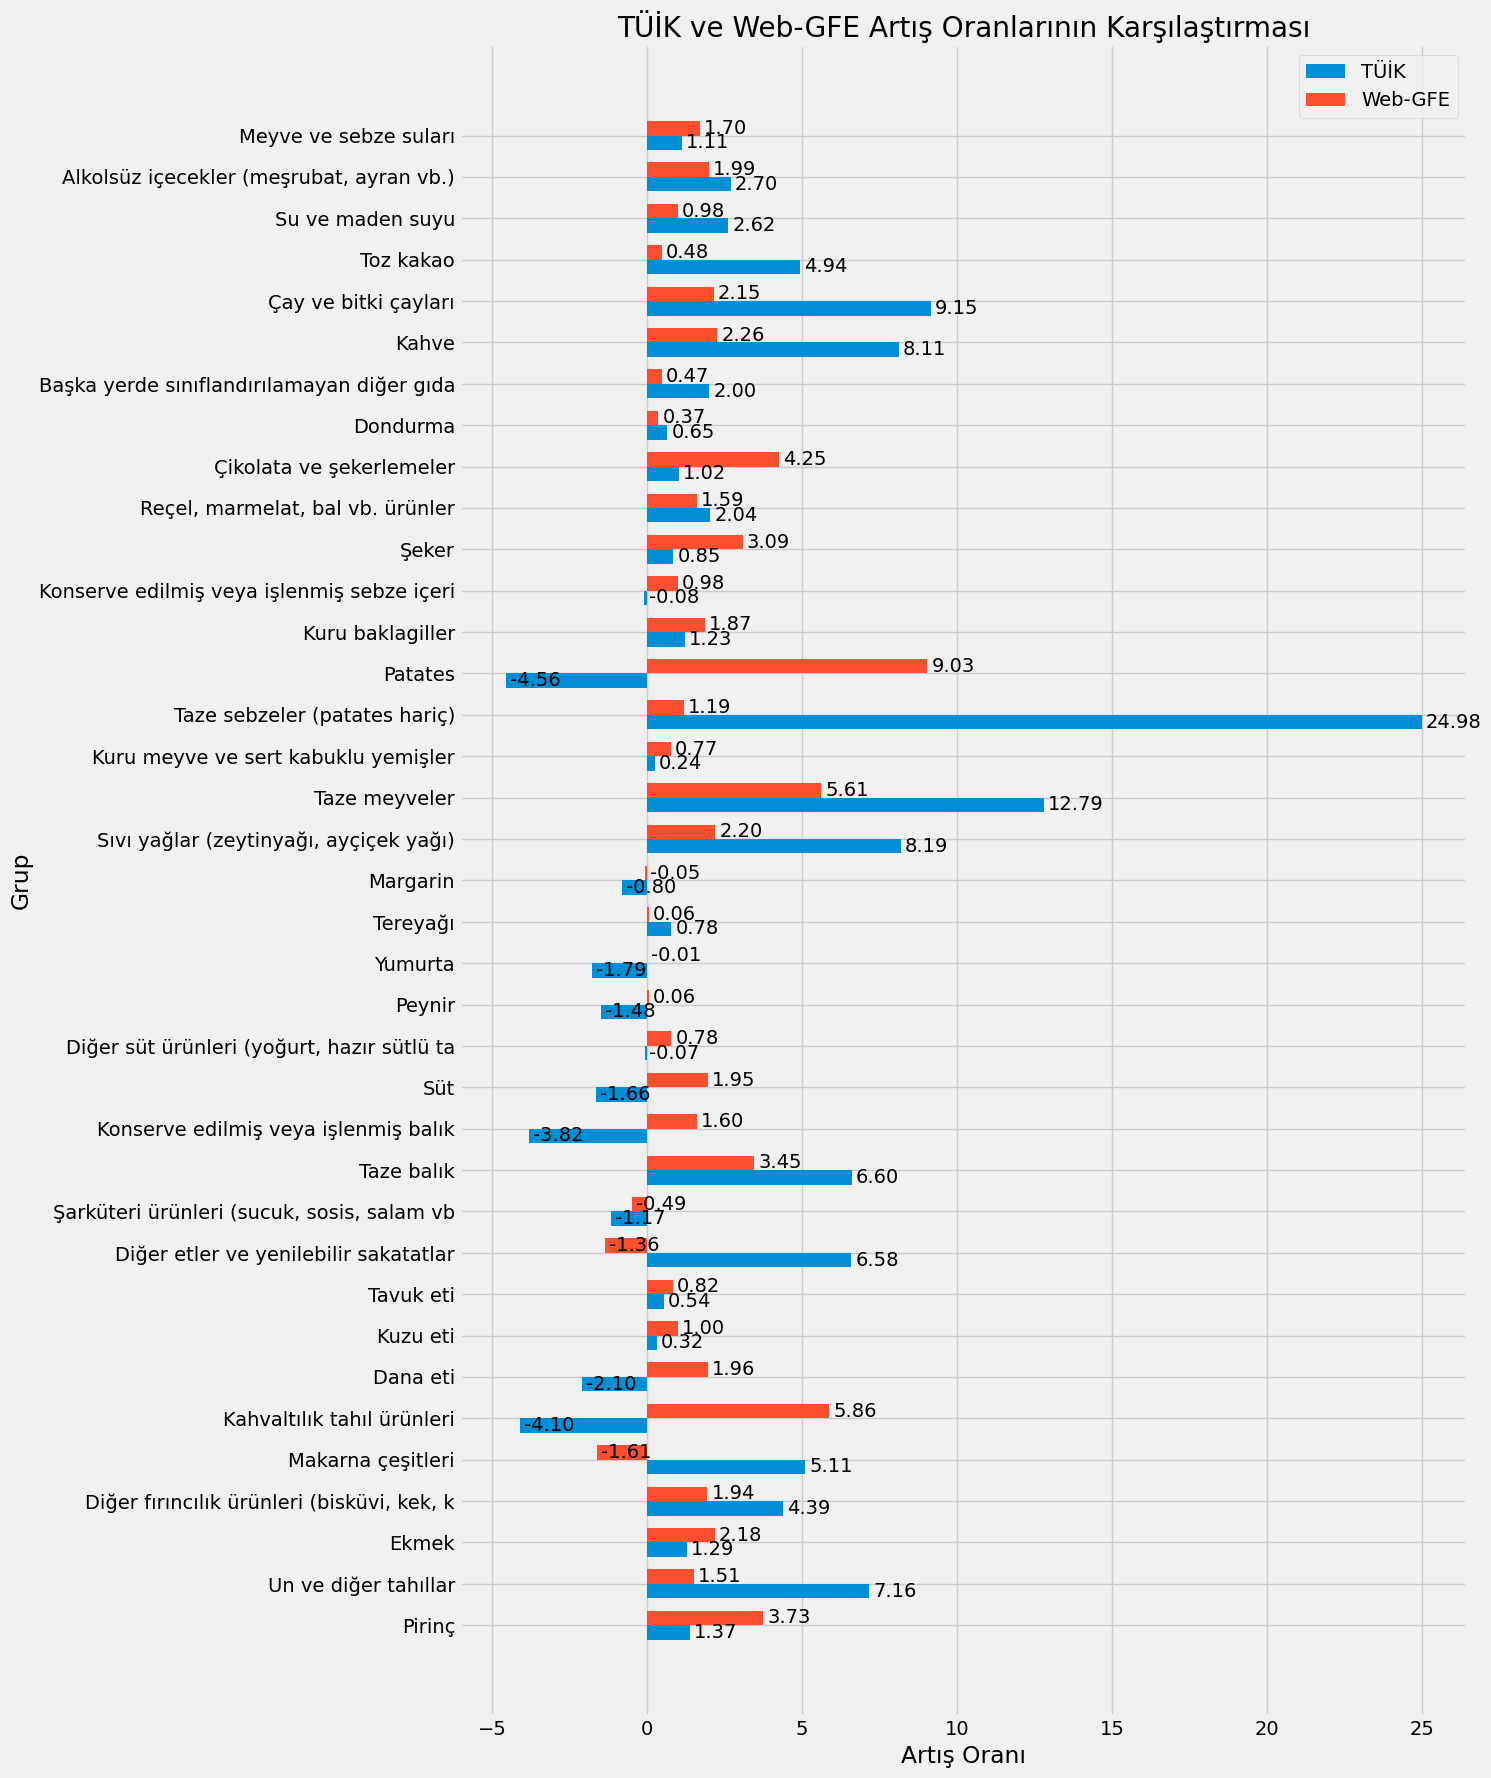

In [112]:
import numpy as np
x = np.arange(len(grouped.index))  # the label locations
width = 0.35  # the width of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Plotting the bar chart with bar labels on the y-axis for better readability

def add_labels_horizontal(rects):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(3, 0),  # 3 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center')

# Sadece ilk 20 karakteri göstermek için indeks isimlerini kısaltıyorum
shortened_index = [label[:42] for label in grouped.index]

# Plotting the horizontal bar chart with shortened index labels
fig, ax = plt.subplots(figsize=(15, 18))

# Horizontal bar chart
rects1 = ax.barh(x - width/2, grouped['TÜİK'], height=width, label='TÜİK')
rects2 = ax.barh(x + width/2, grouped['Ağırlıklı_Artış'], height=width, label='Web-GFE')

# Add some text for labels, title and custom y-axis tick labels, etc.
ax.set_ylabel('Grup')
ax.set_xlabel('Artış Oranı')
ax.set_title('TÜİK ve Web-GFE Artış Oranlarının Karşılaştırması')
ax.set_yticks(x)
ax.set_yticklabels(shortened_index)
ax.legend()

# Adding labels to bars in horizontal orientation
add_labels_horizontal(rects1)
add_labels_horizontal(rects2)

plt.tight_layout()
plt.show()



In [791]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
endeksler=endeksler.drop("Ürün",axis=1)
endeksler.loc["Gıda"]=gfe["GFE"].values

gida_index = endeksler.loc[['Gıda']]  # "Gıda Fiyat Endeksi"ni seç
other_indices = endeksler.drop('Gıda').sort_index()  # Geri kalanları alfabetik sıraya koy


endeksler = pd.concat([gida_index, other_indices])

    
        

    

gruplar = endeksler.index

In [381]:
import numpy as np
tege=pd.read_excel("1730465005111-1.Ekim_2024_Fiyatlar.xlsx")
tege=tege.set_index(pd.to_datetime(tege["Tarih"]))
del tege["Tarih"]
tege=tege.fillna(method="ffill")
tege=tege.fillna(method="bfill")
tege=pd.concat([tege.head(12),tege.tail(3)],axis=0)
tege

C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\734653414.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tege=tege.fillna(method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\734653414.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tege=tege.fillna(method="bfill")


,Antep Fıstığı,Armut,Ay Çekirdeği,Ayran,Ayva,Ayçiçek Yağı,Badem İçi,Baharat,Baklava,Bal,...,Zeytin,Zeytinyağı,Çarliston Biber,Çay,Çikolata Krem,Çikolata Tablet,Çilek,Üzüm,Şeftali,Şehriye
Tarih,,,,,,,,,,,,,,,,,,,,,
2023-08-01,594.862451,38.648758,104.274848,22.665863,19.90,34.284173,359.951856,357.042647,339.853240,199.396800,...,110.082953,232.059465,43.940856,216.680647,123.877979,320.793298,77.9000,48.366761,39.196668,22.557112
2023-09-01,656.973303,40.399762,111.665117,23.779008,19.90,35.610740,369.816559,375.557507,317.745836,219.995768,...,124.189428,255.122395,35.758780,257.861973,127.049662,336.041705,79.9125,45.873467,43.221132,23.799542
2023-10-01,716.385144,45.402846,118.527731,24.763828,19.90,36.077604,390.474487,404.967148,380.284877,227.683249,...,133.389788,264.428262,35.611273,241.018987,133.477060,364.220034,97.4000,49.051250,51.628159,25.421372
2023-11-01,712.241299,42.318087,118.787196,25.435093,28.90,36.874467,412.882782,420.747032,500.648260,239.681155,...,156.806226,273.383204,29.945659,248.117895,141.100070,374.517895,99.9250,53.952348,58.200641,25.421372
2023-12-01,730.327203,40.806849,109.475415,25.440672,41.15,37.769911,431.112665,426.679616,453.840394,237.083033,...,169.668834,279.831313,40.161585,253.759999,146.103899,424.192193,184.2250,64.355377,71.605524,25.421372
2024-01-01,749.080308,40.430998,109.939042,26.478781,46.90,39.156150,456.622441,464.407580,470.066468,265.752751,...,179.431516,299.879258,46.803303,258.604332,152.677237,436.269061,118.9000,87.464071,90.187833,27.735119
2024-02-01,736.425072,45.827357,108.377498,28.923531,50.40,40.331786,484.370865,488.890323,513.611661,272.465229,...,188.647191,301.856495,54.277524,263.145511,157.686182,462.105682,124.9000,74.481873,83.721647,27.735119
2024-03-01,705.990498,55.188826,110.384998,29.132502,55.90,39.307538,454.703544,511.022523,616.784531,254.634065,...,197.486312,310.403650,44.729349,250.943631,151.046255,503.657794,86.9000,64.772927,58.568405,37.000000
2024-04-01,719.242423,58.211774,152.531218,29.132502,55.90,43.097860,451.492656,576.665011,455.025206,300.744098,...,185.833380,444.497750,40.998239,279.246412,160.554660,491.015713,82.4000,64.772927,71.149194,37.000000


In [734]:
tüik=pd.read_excel("madde sepeti ve ortalama madde fiyatlari (turkiye).xls")
madde=tüik.iloc[5:,1]
sepet=pd.DataFrame()
sepet["Madde"]=madde


sepet=pd.concat([sepet,tüik.iloc[:133,135:]],axis=1)
sepet=sepet.head(128)
sepet=sepet.set_index("Madde")
sepet=sepet.T
sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))
sepet=sepet.replace(0, np.nan)
sepet=sepet.fillna(method="ffill")
sepet=sepet.fillna(method="bfill")

columns=sepet.columns.sort_values()
sepet=sepet[columns]
new_dates = pd.date_range(start="2022-05-31", end="2023-07-31", freq="M")

# Yeni tarihleri ekleyerek DataFrame'i genişletme
sepet = sepet.reindex(sepet.index.union(new_dates))

sepet=sepet.sort_index()

sepet=pd.concat([sepet,tege],axis=0)


sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))

def fill_nan_with_growth(series, noise_factor=0.01):
    # NaN değerlerin olduğu indeksleri bul
    nan_mask = series.isna()
    
    # Eğer seride NaN varsa
    if nan_mask.sum() > 0:
        # NaN değerlerden önceki ilk geçerli değeri bul
        first_valid_index = series[nan_mask].index[0] - pd.Timedelta(days=1)
        first_valid_value = series[:first_valid_index].dropna().iloc[-1]

        # NaN değerlerden sonraki ilk geçerli değeri bul
        last_valid_index = series[nan_mask].index[-1] + pd.Timedelta(days=1)
        last_valid_value = series[last_valid_index:].dropna().iloc[0]
        
        # NaN değerlerin sayısını bul
        nan_count = nan_mask.sum()
        
        # Başlangıçtan sona ulaşmak için aylık ortalama artış oranını hesapla
        growth_rate = (last_valid_value / first_valid_value) ** (1 / nan_count) - 1
        
        # NaN değerleri sırayla doldur
        for i, index in enumerate(series[nan_mask].index):
            # Aylık büyüme oranını kullanarak değeri hesapla
            new_value = first_valid_value * (1 + growth_rate) ** (i + 1)
            
            # Gürültü ekle
            noise = np.random.normal(loc=0, scale=new_value * noise_factor)
            series.loc[index] = new_value + noise

    return series

for col in sepet.columns:
    if sepet[col].isna().sum() > 0:  # Sütunda NaN değer varsa işlem yapıyoruz
        sepet[col] = fill_nan_with_growth(sepet[col], noise_factor=0.02)

sepet_fiyat=sepet.copy()
sepet=sepet.pct_change().dropna()
sepet_aylık=sepet*100
sepet=(1+sepet)
sepet=np.cumprod(sepet)*100
sepet_fiyat.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet_fiyat.xlsx")




C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sepet=sepet.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(sepet)))
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sepet=sepet.replace(0, np.nan)
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sepet=sepet.fillna(method="ffill")
C:\Users\Bora\AppData\Local\Temp\ipykernel_9028\3186958290.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will

In [ ]:
from statsmodels.tsa.x13 import x13_arima_analysis
import random
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


sepet_sa = pd.DataFrame()
for col in sepet.columns:
    try:
            ayris = x13_arima_analysis(sepet[col], x12path=x13_path,outlier=True)
            sepet_sa[col] = ayris.seasadj
    except Exception as e:
            print(f"Error processing {col}: {e}")

In [736]:
sepet.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet.xlsx")
sepet_sa.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/sepet_sa.xlsx")

In [737]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")
ağırlıklar=ağırlıklar.sort_index()
ağırlıklar=ağırlıklar["Ağırlık"]

In [738]:
sepet_sa_aylık=sepet_sa.pct_change().dropna()*100
for col in sepet_sa_aylık.columns:

        if col.endswith(" "):
            col1 = col[:-1]
            sepet_sa_aylık[col]=sepet_sa_aylık[col]*ağırlıklar.loc[col1]
        else:
            sepet_sa_aylık[col]=sepet_sa_aylık[col]*ağırlıklar.loc[col]

In [739]:
for col in sepet_aylık.columns:

        if col.endswith(" "):
            col1 = col[:-1]
            sepet_aylık[col]=sepet_aylık[col]*ağırlıklar.loc[col1]
        else:
            sepet_aylık[col]=sepet_aylık[col]*ağırlıklar.loc[col]

In [ ]:
gfe_sa=np.cumprod((sepet_sa_aylık.sum(axis=1)/100)+1)*100
gfe_sa=gfe_sa.sort_index()

In [741]:
gfe=np.cumprod((sepet_aylık.sum(axis=1)/100)+1)*100
gfe.loc["2016-01-31"]=100
gfe=gfe.sort_index()

In [742]:
gfe=pd.DataFrame(gfe)
gfe_sa=pd.DataFrame(gfe_sa)
gfe.columns=["TGFE"]
gfe_sa.columns=["TGFE"]

In [743]:
tge=pd.read_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe.xlsx")
tge=tge.set_index(pd.to_datetime(tge["Unnamed: 0"]))
del tge["Unnamed: 0"]

In [744]:
gfe.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe.xlsx")
gfe_sa.to_excel("C:/Users/Bora/Documents/GitHub/streamlit-inflation/tgfe_sa.xlsx")

In [17]:
sepet=pd.read_csv("sepet.csv")
sepet=sepet.set_index(sepet["Unnamed: 0"])
del sepet["Unnamed: 0"]
sepet["Değişim"]=((sepet.iloc[:,-1]/sepet.iloc[:,1])-1)*100
sepet

,Ürün,2024-10-11,2024-10-12,2024-10-13,2024-10-14,2024-10-15,2024-10-16,2024-10-17,2024-10-18,2024-10-19,...,2024-10-25,2024-10-26,2024-10-27,2024-10-28,2024-10-29,2024-10-30,2024-10-31,2024-11-01,2024-11-02,Değişim
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Antep Fıstığı,Tadım Antep Fıstığı 180 G,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,...,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,187.95,0.000000
Antep Fıstığı,Siirt Fıstığı Tuzlu Kavrulmuş Kg,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,...,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,899.95,0.000000
Antep Fıstığı,Migros Kavrulmuş Antep Fıstığı 150 G,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,...,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,89.50,0.000000
Antep Fıstığı,Migros Antep Fıstığı Jumbo 200 G,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,...,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,123.00,0.000000
Antep Fıstığı,Master Nut Kabuklu Antep Fıstığı 140 G,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,...,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,132.95,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Şehriye,Veronelli Arpa Şehriye 500 G,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,...,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,27.95,0.000000
Şehriye,Mutlu Arpa Şehriye 500 G,17.95,17.95,17.95,17.95,17.95,17.95,17.95,17.95,17.95,...,17.95,17.95,17.95,17.95,17.95,17.95,17.95,19.50,19.50,8.635097
Şehriye,Pastavilla İri Arpa Şehriye 500 Gr,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90,...,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90,27.90,0.000000


In [18]:
endeksler=pd.read_csv("endeksler.csv")
endeksler=endeksler.set_index(endeksler["Ürün"])
del endeksler["Ürün"]
endeksler["Değişim"]=((endeksler.iloc[:,-1]/endeksler.iloc[:,0])-1)*100
endeksler

,Endeks_2024-10-11,Endeks_2024-10-12,Endeks_2024-10-13,Endeks_2024-10-14,Endeks_2024-10-15,Endeks_2024-10-16,Endeks_2024-10-17,Endeks_2024-10-18,Endeks_2024-10-19,Endeks_2024-10-20,...,Endeks_2024-10-26,Endeks_2024-10-27,Endeks_2024-10-28,Endeks_2024-10-29,Endeks_2024-10-30,Endeks_2024-10-31,Endeks_2024-11-01,Endeks_2024-11-02,Endeks_2024-11-03,Değişim
Ürün,,,,,,,,,,,,,,,,,,,,,
Pirinç,100,100.000000,100.000000,104.134813,103.813727,103.813727,103.813727,103.813727,103.357897,103.357897,...,103.776953,103.776953,103.776953,103.776953,103.734033,103.734033,103.734033,103.645140,103.645140,3.645140
Buğday Unu,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.505967,100.505967,100.505967,...,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,100.505967,0.505967
Bebek Sütü (Toz Karışım),100,100.000000,100.000000,100.000000,100.648213,100.648213,98.948425,98.948425,98.948425,98.948425,...,100.648213,100.648213,100.648213,100.648213,100.631592,100.631592,100.631592,100.626240,100.626240,0.626240
Bulgur,100,100.335517,100.335517,104.122568,104.122568,104.514207,104.514207,104.514207,104.872435,104.435169,...,105.698307,105.698307,105.698307,105.698307,105.698307,105.698307,105.698307,105.621302,105.621302,5.621302
Ekmek,100,100.000000,100.000000,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,101.265957,...,102.175406,102.175406,102.175406,102.175406,102.175406,102.175406,102.175406,103.733239,103.733239,3.733239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gazoz Meyveli,100,100.000000,100.000000,100.224921,100.224921,100.336764,100.336764,100.224921,100.224921,100.224921,...,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,101.192031,1.192031
Kola,100,99.936143,99.936143,99.936143,99.936143,101.564164,101.564164,101.112936,101.112936,101.112936,...,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,102.751033,2.751033
Soğuk Çay,100,100.000000,100.000000,100.000000,100.000000,100.332226,100.332226,100.465340,100.685595,100.685595,...,100.685595,100.685595,100.685595,100.685595,100.682948,100.682948,100.682948,100.682948,100.682948,0.682948


In [19]:
from datetime import datetime
today = datetime.today().strftime("%d-%m-%Y")

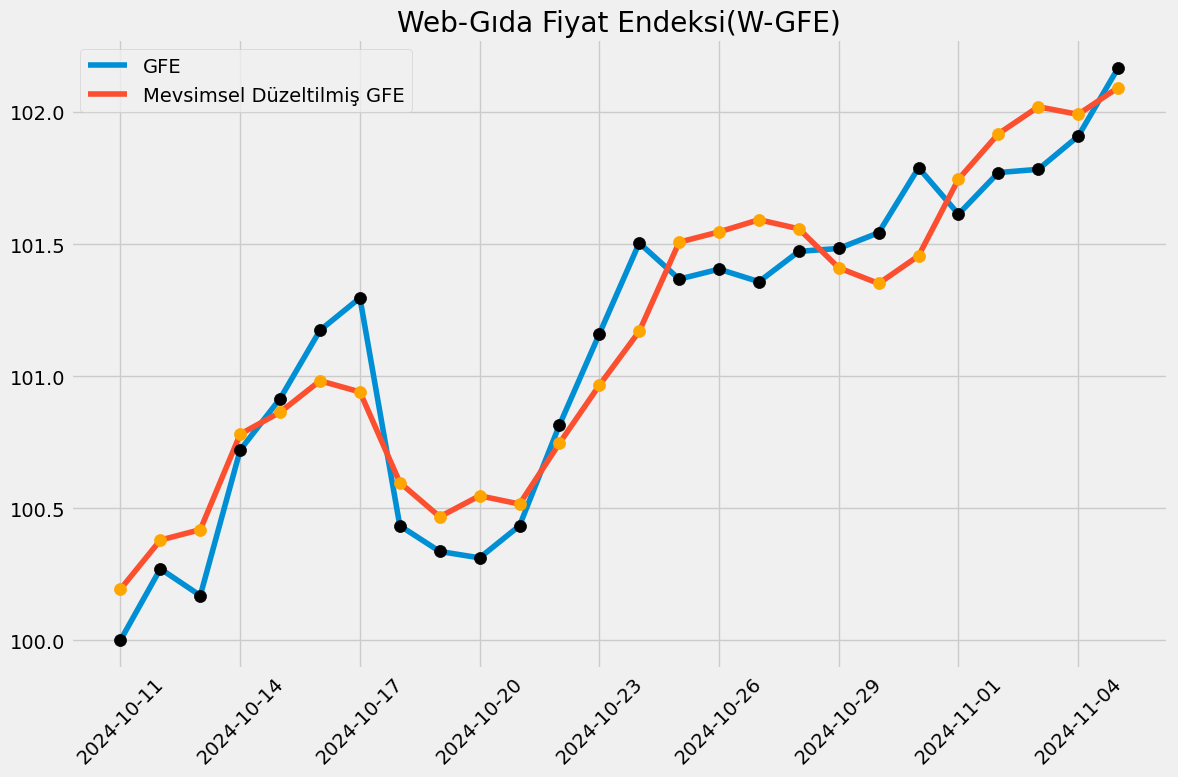

In [22]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Web-Gıda Fiyat Endeksi(W-GFE)")
plt.plot(gfe["GFE"],label="GFE")
plt.plot(gfe["Adjusted"],label="Mevsimsel Düzeltilmiş GFE")
plt.scatter(x=gfe["GFE"].index,y=gfe["GFE"].values,color="black",zorder=3,s=75)
plt.scatter(x=gfe["Adjusted"].index,y=gfe["Adjusted"].values,color="orange",zorder=3,s=75)
plt.xticks(gfe.index[::3],rotation=45)
plt.legend()
plt.tight_layout()
from datetime import date
plt.savefig("gfe_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()

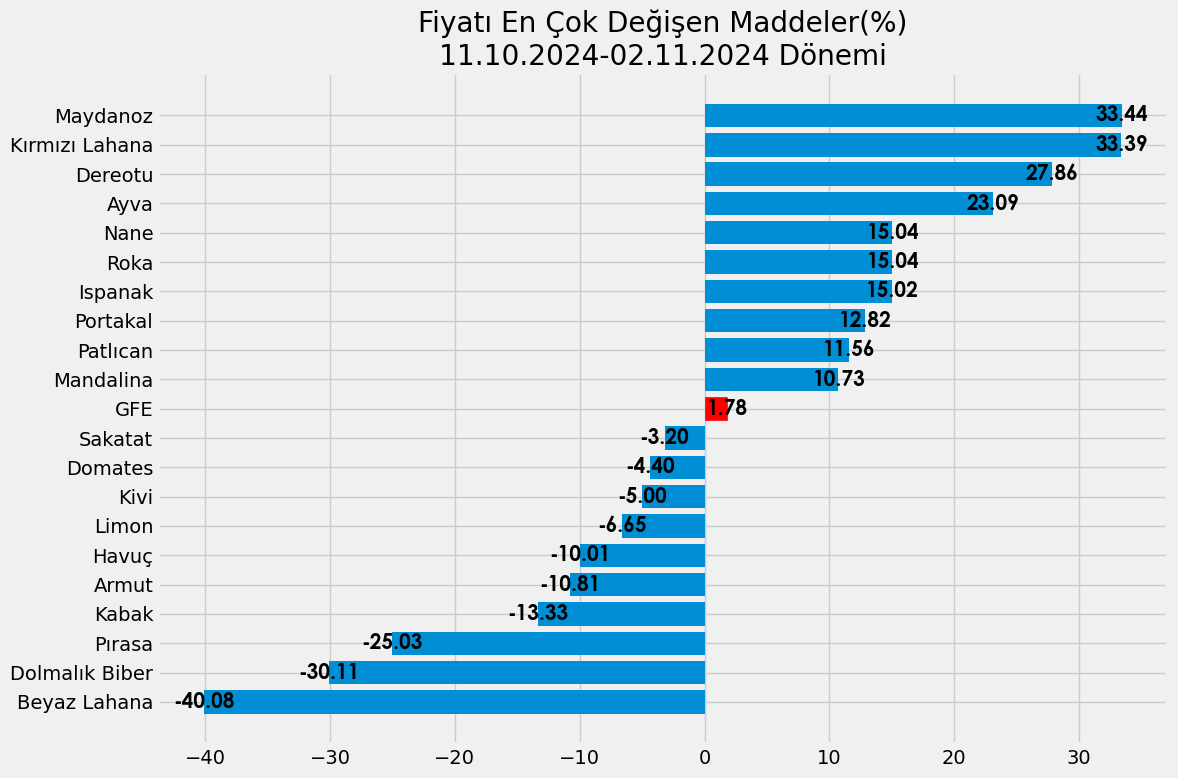

In [6]:

fark=endeksler["Değişim"]
veri=pd.concat([fark.sort_values().head(10),fark.sort_values().tail(10)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
first=gfe.index[0].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Maddeler(%)\n{first}-{last} Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("ürünler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')

plt.show()

In [7]:
sepet=sepet.sort_values(by="Değişim")

In [8]:
sepet=sepet.set_index("Ürün")

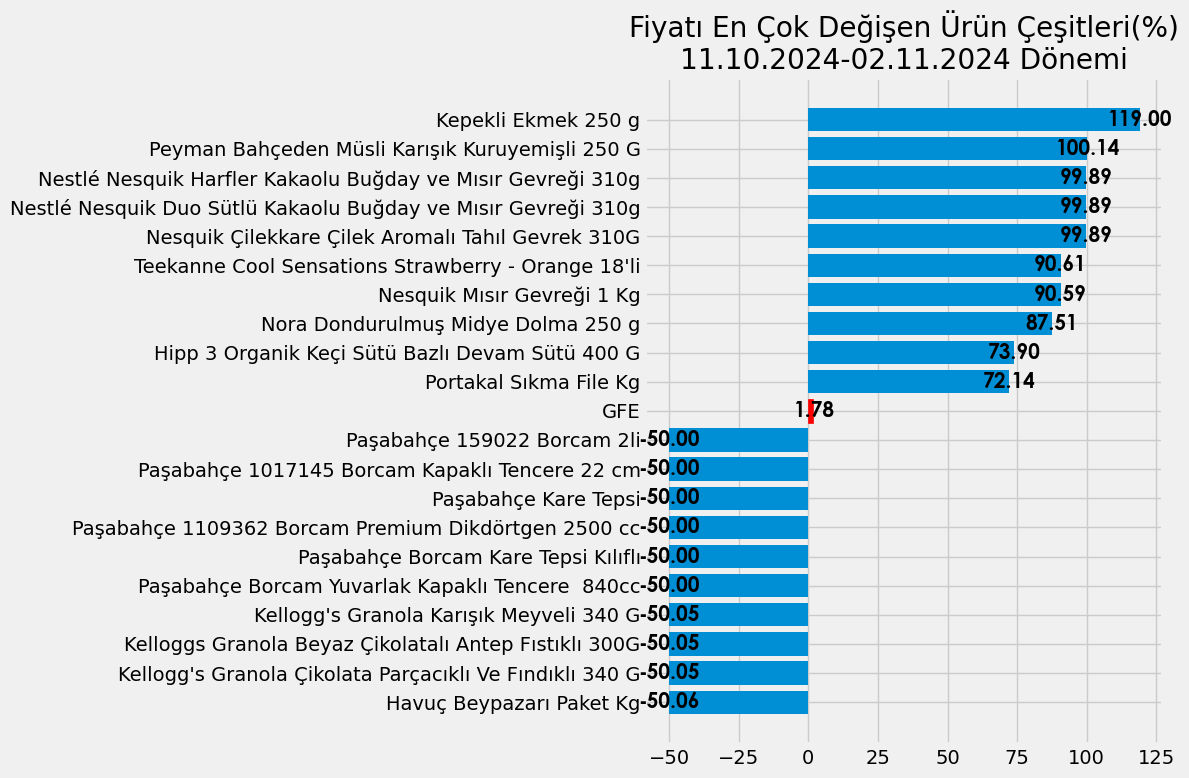

In [9]:

fark=sepet["Değişim"]
veri=pd.concat([fark.sort_values().head(10),fark.sort_values().tail(10)],axis=0)
veri=pd.concat([veri,((gfe.iloc[-1]/gfe.iloc[0])-1)*100],axis=0)
veri=veri.sort_values()
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
first=gfe.index[0].strftime("%d.%m.%Y")
last=gfe.index[-1].strftime("%d.%m.%Y")
plt.title(f"Fiyatı En Çok Değişen Ürün Çeşitleri(%)\n{first}-{last} Dönemi")
bars=plt.barh(y=veri.index,width=veri.values)
for bar, label in zip(bars, veri.index):
    if label == "GFE":
        bar.set_color('red')
for bar in bars:
    plt.text(
        bar.get_width(),        # X coordinate (width of the bar)
        bar.get_y() + bar.get_height() / 2,  # Y coordinate (center of the bar)
        f'{bar.get_width():.2f}',  # Text label (bar width with 2 decimal points)
        va='center',            # Vertical alignment to center
        ha='center',              # Horizontal alignment to the left of the bar end
        fontsize=15,
        fontdict={'family': 'Century Gothic', 'weight': 'bold'}            # Font size for the labels
    )


plt.tight_layout()
plt.savefig("çeşitler_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


In [10]:
ağırlıklar=pd.read_csv("ağırlıklar.csv")
ağırlıklar=ağırlıklar.set_index("Ürün")

In [12]:
import numpy as np
satrim=np.sum(endeksler["Değişim"].sort_values()[31:88].values*(ağırlıklar.loc[endeksler["Değişim"].sort_values()[31:88].index]["Ağırlık"]/ağırlıklar.loc[endeksler["Değişim"].sort_values()[31:88].index]["Ağırlık"].sum()))

In [13]:
medyan=endeksler["Değişim"].median()

In [14]:
esit=endeksler["Değişim"].mean()

In [15]:
egilim=pd.DataFrame()
egilim["W-GFE"]=(((gfe.loc["2024-10-31"]/100)-1)*100).values
egilim["SATRIM"]=satrim
egilim["Medyan"]=medyan
egilim["Aritmetik Ortalama"]=esit
egilim

,W-GFE,SATRIM,Medyan,Aritmetik Ortalama
0,1.788796,0.968061,0.814583,1.794597


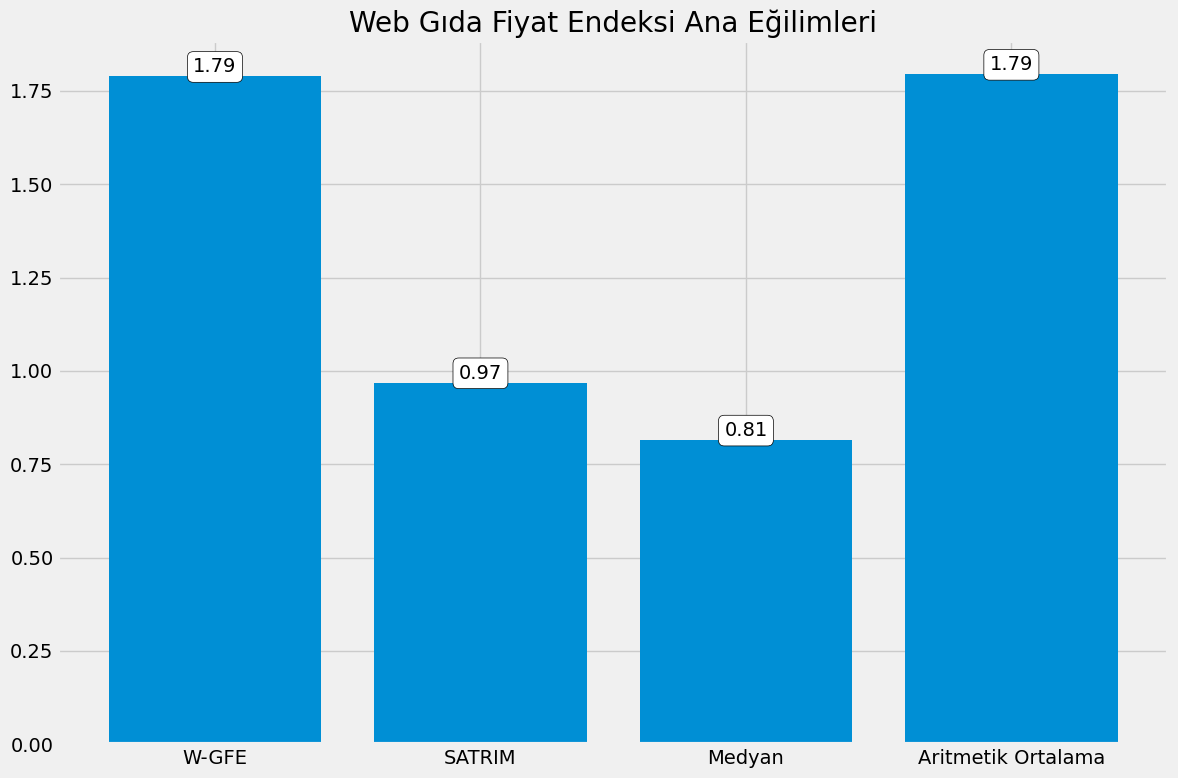

In [16]:
import matplotlib.pyplot as plt

# Grafiği çiz
plt.figure(figsize=(12, 8))
plt.title("Web Gıda Fiyat Endeksi Ana Eğilimleri")
plt.bar(x=egilim.columns, height=egilim.values[0])

# Değerleri kutu içinde sütunların hemen üstüne ekle
for i, value in enumerate(egilim.values[0]):
    plt.text(
        i, value, f'{value:.2f}', ha='center', va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")  # Kutuyu ayarlar
    )
plt.tight_layout()
plt.savefig("egilim_" + date.today().strftime("%d-%m-%Y") + '.png', bbox_inches='tight')
plt.show()


In [ ]:
endeksler1=endeksler.T.iloc[:-1]
endeksler1=endeksler1.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler1))))
aylık=endeksler1.resample('M').mean()
ekim=endeksler1.resample('M').last()
aylık.loc["2024-10-31"]=ekim.loc["2024-10-31"]
aylık.loc[pd.to_datetime("2024-09-30")]=100
aylık=aylık.sort_index()
aylık=aylık.pct_change().dropna()*100

In [20]:
endeksler=endeksler.set_index(pd.date_range(start="2024-10-11",freq="D",periods=(len(endeksler))))

In [56]:
aylık=endeksler.resample('M').mean()
ekim=endeksler.resample('M').last()

C:\Users\Bora\AppData\Local\Temp\ipykernel_10380\2428072938.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylık=endeksler.resample('M').mean()
C:\Users\Bora\AppData\Local\Temp\ipykernel_10380\2428072938.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ekim=endeksler.resample('M').last()


In [67]:
toplam=endeksler.iloc[-1]/endeksler.iloc[0]
aylık["Toplam"]=toplam

In [60]:
aylık=aylık.dropna().T

In [68]:
aylık

,2024-10-31 00:00:00,2024-11-30 00:00:00,Toplam
Ürün,,,
Pirinç,3.734033,-0.042846,1.036451
Buğday Unu,0.505967,0.000000,1.005060
Bebek Sütü (Toz Karışım),0.631592,-0.002659,1.006262
Bulgur,5.698307,-0.036426,1.056213
Ekmek,2.175406,0.762333,1.037332
...,...,...,...
Gazoz Meyveli,1.192031,0.000000,1.011920
Kola,2.751033,0.000000,1.027510
Soğuk Çay,0.682948,0.000000,1.006829


In [57]:
aylık.loc["2024-10-31"]=ekim.loc["2024-10-31"]

In [58]:
aylık.loc[pd.to_datetime("2024-09-30")]=100

In [59]:
aylık=aylık.sort_index()
aylık=aylık.pct_change()*100